# Local Search Methods

## Hill Climbing & Simulated Annealing

- CAP 4630 Intro to AI: Methods Used to Solve N-Queens Problem

#### Import Libraries & Define Constants

In [1]:
import random
from math import exp
import time
from copy import deepcopy
import matplotlib.pyplot as plt

N_QUEENS = 64
TEMPERATURE = 4000

#### Draw $n \times n$ Chess Board With $n$ Randomly Placed Queens:

In [2]:
def create_board(n):        # n = N_QUEENS
    # Create a chess board with a queen on a row
    chess_board = {}        # index of list = the row of each queen, value of index = the column of queen on the board.
    temp = list(range(n))   # create a list with N_QUEENS number of elements
    random.shuffle(temp)    # shuffle all the queens (random values) on the board to make sure it is random
    column = 0

    while len(temp) > 0:
        row = random.choice(temp)
        chess_board[column] = row
        temp.remove(row)
        column += 1
    del temp
    return chess_board      # returns to the search method: SA or HC

#### Calculate Number of Attacking Queens On The Board:

In [3]:
def threat_calculate(n):
    # Combination formula. It is choosing two queens in n queens
    if n < 2:
        return 0
    if n == 2:
        return 1
    return (n - 1) * n / 2  # returns to the cost() function

def cost(chess_board):
    # Calculate how many pairs of threatened queen
    threat = 0
    m_chessboard = {}
    a_chessboard = {}

    for column in chess_board:
        temp_m = column - chess_board[column]
        temp_a = column + chess_board[column]
        if temp_m not in m_chessboard:
            m_chessboard[temp_m] = 1
        else:
            m_chessboard[temp_m] += 1
        if temp_a not in a_chessboard:
            a_chessboard[temp_a] = 1
        else:
            a_chessboard[temp_a] += 1

    for i in m_chessboard:
        threat += threat_calculate(m_chessboard[i])
    del m_chessboard

    for i in a_chessboard:
        threat += threat_calculate(a_chessboard[i])
    del a_chessboard

    return threat               # returns to the search method: SA or HC

#### Function to Print Solution:
 - (COLUMN) => (ROW)

In [4]:
def print_chess_board(board):
    # Print the chess board
    for column, row in board.items():
        print("{} => {}".format(column, row))

#### Define Hill Climbing Function:

In [5]:
def hill_climbing():
    # Hill Climbing Search
    solution_found = False
    answer = create_board(N_QUEENS)

    # To avoid recounting when can not find a better state
    cost_answer = cost(answer)  # given our initial layout, how many queens are attacking?
    
    # Record costs:
    Costs=[]
    Costs.append(cost_answer)

    t = TEMPERATURE             # erroneous: only for SA (delete)
    sch = 0.99                  # erroneous (delete)

    while t > 0.00001:          # change to `while x > 0` and define x. Calculate average # loops for a failed state.
        t *= sch                # erroneous: delete and replace with an integer
        successor = deepcopy(answer)    # create an identical successor from current state for modification
        while True:                     # Can we change to `while index_1 == index_2` and ditch the `break`?
            index_1 = random.randrange(0, N_QUEENS - 1) # pick a random number queen in the list
            index_2 = random.randrange(0, N_QUEENS - 1) # pick a random number queen in the list
            if index_1 != index_2:
                break
        successor[index_1], successor[index_2] = successor[index_2], \
            successor[index_1]          # swap the two randomly chosen queens 
        
        delta = cost(successor) - cost_answer   # cost of successor - cost of current state
        if delta < 0:                           # represents a "good" move: less # of queens attacking satisfies hill climbing
            answer = deepcopy(successor)        # move to that successor
            cost_answer = cost(answer)          # calculate the new cost
            Costs.append(cost_answer)
        if cost_answer == 0:                    # represents a solution: no queens attacking
            solution_found = True
            print("Successful Solution:")
            print_chess_board(answer)            
            break
    if solution_found is False:
        print("Failed")                         # Add a counter for how many loops until it fails
        return(False, Costs)
    else:
        return(True, Costs)

#### Define Simulated Annealing Function:

In [6]:
def simulated_annealing():
    # Simulated Annealing
    solution_found = False
    answer = create_board(N_QUEENS)

    # To avoid recounting when can not find a better state
    cost_answer = cost(answer)
    
    # Record costs:
    Costs = []
    Costs.append(cost_answer)

    t = TEMPERATURE
    sch = 0.99

    while t > 0.00001:
        t *= sch
        successor = deepcopy(answer)
        while True:
            index_1 = random.randrange(0, N_QUEENS - 1)
            index_2 = random.randrange(0, N_QUEENS - 1)
            if index_1 != index_2:
                break
        successor[index_1], successor[index_2] = successor[index_2], \
            successor[index_1]  # swap two chosen queens
        
        delta = cost(successor) - cost_answer
        if delta < 0 or random.uniform(0, 1) < exp(-delta / t):     # change from hill climbing: only for "good" moves
            answer = deepcopy(successor)
            cost_answer = cost(answer)
            Costs.append(cost_answer)
        if cost_answer == 0:
            solution_found = True
            print("Successful Solution:")
            print_chess_board(answer)            
            break
    if solution_found is False:
        print("Failed")
        return(False, Costs)
    else:
        return(True, Costs)

#### Main Function:

Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Successful Solution:
0 => 3
1 => 7
2 => 10
3 => 31
4 => 50
5 => 27
6 => 5
7 => 46
8 => 37
9 => 43
10 => 17
11 => 32
12 => 63
13 => 24
14 => 52
15 => 16
16 => 35
17 => 11
18 => 42
19 => 51
20 => 9
21 => 44
22 => 20
23 => 54
24 => 59
25 => 55
26 => 36
27 => 13
28 => 28
29 => 19
30 => 6
31 => 4
32 => 49
33 => 60
34 => 29
35 => 15
36 => 40
37 => 12
38 => 53
39 => 22
40 => 1
41 => 18
42 => 62
43 => 45
44 => 56
45 => 61
46 => 38
47 => 0
48 => 30
49 => 58
50 => 14
51 => 23
52 => 21
53 => 41
54 => 25
55 => 2
56 => 34
57 => 48
58 => 39
59 => 8
60 => 57
61 => 26
62 => 47
63 => 33
It took 16 repetitions to succeed. Runtime in seconds: 2.935912:


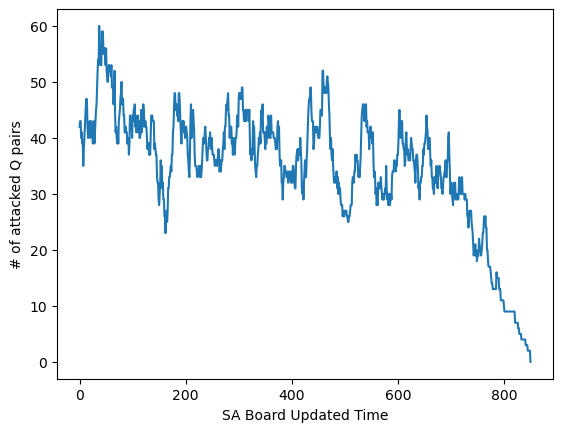

In [8]:
def main(method):
    start = time.time()
    Success = False
    repetitions = 0
    while not Success:
        if method == 'SA':
            Success, Costs = simulated_annealing()
            repetitions = repetitions + 1           # every time it fails and restarts is a repetition
            #plt.plot(Costs)
        elif method == 'HC':
            Success, Costs = hill_climbing()
            repetitions = repetitions + 1           # every time it fails and restarts is a repetition
            #plt.plot(Costs)
    print("It took %d repetitions to succeed. Runtime in seconds: %f:"% (repetitions,(time.time() - start)))
    return(Success, Costs)


if __name__ == "__main__":
    method = 'SA'           # 'SA' or 'HC'
    Success, Costs = main(method)  # HC: hill_climbing or SA: Simulated annealing
    plt.plot(Costs)
    plt.xlabel(method + ' Board Updated Time')
    plt.ylabel('# of attacked Q pairs')